# Setup

In [1]:
"""
import os
import zipfile #to unszip our data

#!kaggle competitions download -c titanic -p dataset


myzip = zipfile.ZipFile(os.path.join('dataset',os.listdir('dataset')[0]))
myzip.extractall(path="dataset")
myzip.close()

"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Train_path = 'dataset/train.csv'
Test_path = 'dataset/test.csv'

Data_train = pd.read_csv(Train_path)
Data_test = pd.read_csv(Test_path)
print("Setup complete.")

Setup complete.


<img src='dataset/data_dict.PNG'>

## Clean our Data

In [2]:
Data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here we can see that some Cabin is Nan, let's check if there is others missing values in the data set. 

In [3]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In fact we have missing value for: 
- Age (177 null)

Here we have two options : We could discard the instance where age is null OR We could fill the missing values with median. Since the missing values represent almost 20% of the passengers, I think it's bette to fill the missing values. Indeed, if we discard them, we will have a shorter training set (it's not good when we would like to fit our data with models). 

- Cabin (687 null)

Since for the Cabin feature we have to much missing data, we can omit this feature from our data. Moreover, the cabin could be related to ticket price (fare, which is complete) or related to the Pclass (1st class could have the best cabin, etc.)

- Embarked (2 null)

For this last feature, we could discard the 2 missings instances, or put a random value, for example we could put 'C'


In [4]:
Data_train.Age.fillna(Data_train.Age.median(),inplace=True)
Data_train = Data_train.drop(['Cabin'],axis=1)
Data_train.Embarked.fillna('C',inplace=True)

In [5]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


We continue by completed the missing values for age and for Embarked :

##### Note 
We can also discard the name (useless) and the ticket (We make the asumption that there is correlation between ticket and the Fare or the Pclass)

In [6]:
features_to_drop = ['Name','Ticket']
Data_train = Data_train.drop(features_to_drop,axis=1)

In [7]:
Data_train.info()
# Since we don't have missing values, we can complete to clean our data. We have still two object type (Sex and Embarked)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [8]:
print(Data_train.Embarked.value_counts(),'\n')
print(Data_train.Sex.value_counts())

S    644
C    170
Q     77
Name: Embarked, dtype: int64 

male      577
female    314
Name: Sex, dtype: int64


As we can see, we have 2 categories for Sex : we could replace male by 0 and female by 1.
For the Embarked feature, we could make an OneHotEncoder.

In [9]:
Data_train.Sex.replace(['male','female'],[1,0],inplace=True)

In [10]:
from sklearn.preprocessing import OneHotEncoder

Embarked_cat = Data_train[['Embarked']]

encoder = OneHotEncoder()

Embarked_cat_1hot = encoder.fit_transform(Embarked_cat)

## Automate the transformation 

We have now a good insight about how we have to make the transformation on our data. Since we want to make something good, we could build a pipeline to transform our data (Fit_Transform on our Data_train AND Transform on Data_Test). For this purpose, we will use ColumnTransformer.

First we create our own transformer to change the following features as discused above:
- Sex
- Age 
- Name
- Ticket
- Cabin
- Embarked 

In [11]:
Data_train = pd.read_csv(Train_path,index_col=0)
y_survived = Data_train.Survived.copy()

Data_train.drop(['Survived'],axis=1,inplace=True)

In [12]:
Data_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

class Change_Non_Cat_Features(BaseEstimator,TransformerMixin):
    def __init__(self):
        self = self
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)
        X.Sex.replace(['male','female'],[1,0],inplace=True)
        return np.c_[X]
    
from sklearn.compose import ColumnTransformer

cat_feature = ['Embarked']

non_cat_features = list(Data_train)
non_cat_features.remove('Embarked')



num_pipeline = Pipeline([("non_cat_features",Change_Non_Cat_Features()),
                         ("fill_miss_value",SimpleImputer()),
                         ("scaled",MinMaxScaler())])    
  

Data_Transformer = ColumnTransformer([
    ("non_cat_features",num_pipeline, non_cat_features),
    ("cat_feature",OneHotEncoder(), cat_feature)])
    
"""   
Data_Transformer = ColumnTransformer([
    ("non_cat_features",Change_Non_Cat_Features(),non_cat_features),
    #("Fill_Median_Value", SimpleImputer(strategy='median'),scaled_features),    
    ("scaled",MinMaxScaler(), []),
    ("cat_feature",OneHotEncoder(), cat_feature)])
"""

'   \nData_Transformer = ColumnTransformer([\n    ("non_cat_features",Change_Non_Cat_Features(),non_cat_features),\n    #("Fill_Median_Value", SimpleImputer(strategy=\'median\'),scaled_features),    \n    ("scaled",MinMaxScaler(), []),\n    ("cat_feature",OneHotEncoder(), cat_feature)])\n'

In [14]:
Data = pd.read_csv(Train_path)

Data.Embarked.fillna('C',inplace=True)
Data = Data.drop(['Survived'],axis=1)

Data_prepared = Data_Transformer.fit_transform(Data)

In [15]:
# If we want to get the different columns

# Get the columns for the one hot encoder
hotencoder = Data_Transformer.named_transformers_['cat_feature']
Embarked_list = list(hotencoder.categories_[0])

Features_list = ['Pclass','Sex','Age','SibSp','Parch','Fare'] + Embarked_list

In [16]:
# We can rebuild a pandas DataFrame
pd.DataFrame(Data_prepared,columns=Features_list)


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,0.0,0.0,1.0
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,1.0,0.0,0.367921,0.125,0.333333,0.045771,0.0,0.0,1.0
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


## Model selection

## First let's try to build a linear regression (basics)

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(Data_prepared,y_survived)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

surv_predict_lin = lin_reg.predict(Data_prepared)

MAE = mean_absolute_error(y_survived,surv_predict_lin)
print("MAE:", MAE)

MAE: 0.2917948455907191


In [19]:
from sklearn.model_selection import cross_val_score

scores_lin = cross_val_score(lin_reg,Data_prepared,y_survived,
                         verbose=0,scoring='neg_mean_absolute_error',
                         cv=5,n_jobs=1)

In [20]:
print("MEAN MAE LINEAR CROSS :",(-scores_lin).mean())
print("std LINEAR CROSS :",(-scores_lin).std())

MEAN MAE LINEAR CROSS : 0.2968126419667576
std LINEAR CROSS : 0.010789090722755988


## Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(criterion='mae')
tree_reg.fit(Data_prepared,y_survived)

surv_predict_tree = tree_reg.predict(Data_prepared)


Tree_MAE = mean_absolute_error(y_survived,surv_predict_tree)
print("MAE:", Tree_MAE)

MAE: 0.017957351290684626


In [22]:
scores_tree = cross_val_score(tree_reg,Data_prepared,y_survived,
                         verbose=0,scoring='neg_mean_absolute_error',
                         cv=5,n_jobs=1)

In [23]:
print("MEAN MAE TREE CROSS :",(-scores_tree).mean())
print("std TREE CROSS :",(-scores_tree).std())

MEAN MAE TREE CROSS : 0.23565061829138156
std TREE CROSS : 0.029571742807643527


## Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(criterion='mae')
forest_reg.fit(Data_prepared,y_survived)

surv_predict_forest = forest_reg.predict(Data_prepared)

Forest_MAE = mean_absolute_error(y_survived,surv_predict_forest)
print("MAE:", Tree_MAE)

MAE: 0.017957351290684626


In [25]:
scores_forest = cross_val_score(forest_reg,Data_prepared,y_survived,
                         verbose=0,scoring='neg_mean_absolute_error',
                         cv=5,n_jobs=1)

In [26]:
print("MEAN MAE TREE CROSS :",(-scores_forest).mean())
print("std TREE CROSS :",(-scores_forest).std())

MEAN MAE TREE CROSS : 0.24731529721925805
std TREE CROSS : 0.01916714395534831


## SVR

In [27]:
from sklearn.svm import SVR, NuSVR, LinearSVR

#### SVR

In [28]:
SVR_reg = SVR()
SVR_reg.fit(Data_prepared,y_survived)

surv_predict_SVR = SVR_reg.predict(Data_prepared)

SVR_MAE = mean_absolute_error(y_survived,surv_predict_SVR)
print("MAE:", SVR_MAE)

MAE: 0.23610435288805906


In [29]:
scores_SVR = cross_val_score(SVR_reg,Data_prepared,y_survived,
                         verbose=0,scoring='neg_mean_absolute_error',
                         cv=5,n_jobs=1)

In [30]:
print("MEAN MAE TREE CROSS :",(-scores_SVR).mean())
print("std TREE CROSS :",(-scores_SVR).std())

MEAN MAE TREE CROSS : 0.2431311436906578
std TREE CROSS : 0.015546675699856223


#### NuSVR

In [31]:
NUSVR_reg = NuSVR()
NUSVR_reg.fit(Data_prepared,y_survived)

surv_predict_NUSVR = NUSVR_reg.predict(Data_prepared)

NUSVR_MAE = mean_absolute_error(y_survived,surv_predict_NUSVR)
print("MAE:", NUSVR_MAE)

MAE: 0.18833307812898967


In [32]:
scores_NUSVR = cross_val_score(NUSVR_reg,Data_prepared,y_survived,
                         verbose=0,scoring='neg_mean_absolute_error',
                         cv=5,n_jobs=1)

In [33]:
print("MEAN MAE TREE CROSS :",(-scores_NUSVR).mean())
print("std TREE CROSS :",(-scores_NUSVR).std())

MEAN MAE TREE CROSS : 0.19809193708075368
std TREE CROSS : 0.02123178156751093


#### LinearSVR

In [34]:
LINSVR_reg = LinearSVR()
LINSVR_reg.fit(Data_prepared,y_survived)

surv_predict_LINSVR = LINSVR_reg.predict(Data_prepared)

LINSVR_MAE = mean_absolute_error(y_survived,surv_predict_LINSVR)
print("MAE:", LINSVR_MAE)

MAE: 0.21324897376346247


In [35]:
scores_LINSVR = cross_val_score(LINSVR_reg,Data_prepared,y_survived,
                         verbose=0,scoring='neg_mean_absolute_error',
                         cv=5,n_jobs=1)

In [36]:
print("MEAN MAE TREE CROSS :",(-scores_LINSVR).mean())
print("std TREE CROSS :",(-scores_LINSVR).std())

MEAN MAE TREE CROSS : 0.21328145083509836
std TREE CROSS : 0.02773563612732684


## KNeighborsRegressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

KNR_reg = KNeighborsRegressor(n_neighbors=5)
KNR_reg.fit(Data_prepared,y_survived)

surv_predict_KNR = KNR_reg.predict(Data_prepared)

KNR_MAE = mean_absolute_error(y_survived,surv_predict_KNR)
print("MAE:", KNR_MAE)


MAE: 0.20291806958473627


In [38]:
scores_KNR = cross_val_score(KNR_reg,Data_prepared,y_survived,
                         verbose=0,scoring='neg_mean_absolute_error',
                         cv=5,n_jobs=1)

In [39]:
print("MEAN MAE TREE CROSS :",(-scores_KNR).mean())
print("std TREE CROSS :",(-scores_KNR).std())

MEAN MAE TREE CROSS : 0.2525102002385287
std TREE CROSS : 0.010160241888024304


We can see that SVR (linSVR, NuSVR, SVR) doesn't overfit too much (MAE for the predict an all the training set is near the MAE from crossvalidation). 

Even if we don't overfitt the data, we can try to search the better parameter (Fine Tuning). 

## Fine Tune the model with SVR 

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid_SVR = [{'kernel':['linear'], 'C':[1,2,3,4],'verbose':[1]},
                  {'kernel':['poly'], 'degree':[1,2,3],'verbose':[1]},
                  {'kernel':['rbf'], 'gamma':[1,2,3],'verbose':[1]},
                 ]
SVR_reg = SVR()

grid_search_SVR = GridSearchCV(SVR_reg,param_grid=param_grid_SVR,
                               cv=5,scoring='neg_mean_absolute_error',
                               verbose=3)

In [41]:
grid_search_SVR.fit(Data_prepared,y_survived)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=1, kernel=linear, verbose=1, score=-0.242, total=   0.0s
[CV] C=1, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=1, kernel=linear, verbose=1, score=-0.253, total=   0.0s
[CV] C=1, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=1, kernel=linear, verbose=1, score=-0.270, total=   0.0s
[CV] C=1, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=1, kernel=linear, verbose=1, score=-0.311, total=   0.0s
[CV] C=1, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=1, kernel=linear, verbose=1, score=-0.257, total=   0.0s
[CV] C=2, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=2, kernel=linear, verbose=1, score=-0.242, total=   0.0s
[CV] C=2, kernel=linear, verbose=1 ....

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[LibSVM][CV] ...... C=2, kernel=linear, verbose=1, score=-0.253, total=   0.0s
[CV] C=2, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=2, kernel=linear, verbose=1, score=-0.270, total=   0.0s
[CV] C=2, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=2, kernel=linear, verbose=1, score=-0.311, total=   0.0s
[CV] C=2, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=2, kernel=linear, verbose=1, score=-0.257, total=   0.0s
[CV] C=3, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=3, kernel=linear, verbose=1, score=-0.242, total=   0.0s
[CV] C=3, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=3, kernel=linear, verbose=1, score=-0.252, total=   0.0s
[CV] C=3, kernel=linear, verbose=1 ...................................
[LibSVM][CV] ...... C=3, kernel=linear, verbose=1, score=-0.270, total=   0.0s
[CV] C=3, kernel=line

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 2, 3, 4], 'kernel': ['linear'],
                          'verbose': [1]},
                         {'degree': [1, 2, 3], 'kernel': ['poly'],
                          'verbose': [1]},
                         {'gamma': [1, 2, 3], 'kernel': ['rbf'],
                          'verbose': [1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=3)

In [42]:
print(grid_search_SVR.best_params_) #0.238 MAE MEAN
for mean,params in zip(grid_search_SVR.cv_results_["mean_test_score"],grid_search_SVR.cv_results_["params"]):
    print("MEAN_MAE_SVR,{:.3} {} ".format(-mean,params))

{'gamma': 2, 'kernel': 'rbf', 'verbose': 1}
MEAN_MAE_SVR,0.267 {'C': 1, 'kernel': 'linear', 'verbose': 1} 
MEAN_MAE_SVR,0.266 {'C': 2, 'kernel': 'linear', 'verbose': 1} 
MEAN_MAE_SVR,0.267 {'C': 3, 'kernel': 'linear', 'verbose': 1} 
MEAN_MAE_SVR,0.267 {'C': 4, 'kernel': 'linear', 'verbose': 1} 
MEAN_MAE_SVR,0.267 {'degree': 1, 'kernel': 'poly', 'verbose': 1} 
MEAN_MAE_SVR,0.248 {'degree': 2, 'kernel': 'poly', 'verbose': 1} 
MEAN_MAE_SVR,0.243 {'degree': 3, 'kernel': 'poly', 'verbose': 1} 
MEAN_MAE_SVR,0.239 {'gamma': 1, 'kernel': 'rbf', 'verbose': 1} 
MEAN_MAE_SVR,0.238 {'gamma': 2, 'kernel': 'rbf', 'verbose': 1} 
MEAN_MAE_SVR,0.241 {'gamma': 3, 'kernel': 'rbf', 'verbose': 1} 


In [43]:
param_grid_NUSVR = [{'nu':[0.1,0.2], 'C':[0.1,0.5],
                     'kernel':['rbf'], 'gamma':[0.8],'verbose':[True]},
                    {'nu':[0.1,0.2], 'C':[0.1],
                     'kernel':['sigmoid'], 'gamma':[0.8],'verbose':[True]},
                  ]
NUSVR_reg = NuSVR()

grid_search_NUSVR = GridSearchCV(NUSVR_reg,param_grid=param_grid_NUSVR,
                               cv=5,scoring='neg_mean_absolute_error',
                               verbose=3)

grid_search_NUSVR.fit(Data_prepared,y_survived)
                 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.1, gamma=0.8, kernel=rbf, nu=0.1, verbose=True ..............
[LibSVM][CV]  C=0.1, gamma=0.8, kernel=rbf, nu=0.1, verbose=True, score=-0.500, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf, nu=0.1, verbose=True ..............
[LibSVM][CV]  C=0.1, gamma=0.8, kernel=rbf, nu=0.1, verbose=True, score=-0.500, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf, nu=0.1, verbose=True ..............
[LibSVM][CV]  C=0.1, gamma=0.8, kernel=rbf, nu=0.1, verbose=True, score=-0.500, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf, nu=0.1, verbose=True ..............
[LibSVM][CV]  C=0.1, gamma=0.8, kernel=rbf, nu=0.1, verbose=True, score=-0.500, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf, nu=0.1, verbose=True ..............
[LibSVM][CV]  C=0.1, gamma=0.8, kernel=rbf, nu=0.1, verbose=True, score=-0.500, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf, nu=0.2, verbose=True ..............
[LibSVM][CV]  C=0.1, gamma=0.8, kernel=rbf, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.8, kernel=rbf, nu=0.2, verbose=True, score=-0.500, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf, nu=0.2, verbose=True ..............
[LibSVM][CV]  C=0.1, gamma=0.8, kernel=rbf, nu=0.2, verbose=True, score=-0.500, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf, nu=0.2, verbose=True ..............
[LibSVM][CV]  C=0.1, gamma=0.8, kernel=rbf, nu=0.2, verbose=True, score=-0.500, total=   0.0s
[CV] C=0.5, gamma=0.8, kernel=rbf, nu=0.1, verbose=True ..............
[LibSVM][CV]  C=0.5, gamma=0.8, kernel=rbf, nu=0.1, verbose=True, score=-0.500, total=   0.0s
[CV] C=0.5, gamma=0.8, kernel=rbf, nu=0.1, verbose=True ..............
[LibSVM][CV]  C=0.5, gamma=0.8, kernel=rbf, nu=0.1, verbose=True, score=-0.500, total=   0.0s
[CV] C=0.5, gamma=0.8, kernel=rbf, nu=0.1, verbose=True ..............
[LibSVM][CV]  C=0.5, gamma=0.8, kernel=rbf, nu=0.1, verbose=True, score=-0.500, total=   0.0s
[CV] C=0.5, gamma=0.8, kernel=rbf, nu=0.1, verbose=True ..............
[LibSVM][CV]  C=0.

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                             gamma='scale', kernel='rbf', max_iter=-1, nu=0.5,
                             shrinking=True, tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5], 'gamma': [0.8], 'kernel': ['rbf'],
                          'nu': [0.1, 0.2], 'verbose': [True]},
                         {'C': [0.1], 'gamma': [0.8], 'kernel': ['sigmoid'],
                          'nu': [0.1, 0.2], 'verbose': [True]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=3)

In [44]:
print(grid_search_NUSVR.best_params_) # 0.197 MAE MEAN
for mean,params in zip(grid_search_NUSVR.cv_results_["mean_test_score"],grid_search_NUSVR.cv_results_["params"]):
    print("MEAN_MAE_NUSVR,{:.3} {} ".format(-mean,params))

{'C': 0.1, 'gamma': 0.8, 'kernel': 'sigmoid', 'nu': 0.1, 'verbose': True}
MEAN_MAE_NUSVR,0.5 {'C': 0.1, 'gamma': 0.8, 'kernel': 'rbf', 'nu': 0.1, 'verbose': True} 
MEAN_MAE_NUSVR,0.5 {'C': 0.1, 'gamma': 0.8, 'kernel': 'rbf', 'nu': 0.2, 'verbose': True} 
MEAN_MAE_NUSVR,0.5 {'C': 0.5, 'gamma': 0.8, 'kernel': 'rbf', 'nu': 0.1, 'verbose': True} 
MEAN_MAE_NUSVR,0.5 {'C': 0.5, 'gamma': 0.8, 'kernel': 'rbf', 'nu': 0.2, 'verbose': True} 
MEAN_MAE_NUSVR,0.482 {'C': 0.1, 'gamma': 0.8, 'kernel': 'sigmoid', 'nu': 0.1, 'verbose': True} 
MEAN_MAE_NUSVR,0.593 {'C': 0.1, 'gamma': 0.8, 'kernel': 'sigmoid', 'nu': 0.2, 'verbose': True} 


# Compute the prediction for our model
({'C': 0.5, 'gamma': 0.8, 'kernel': 'rbf', 'nu': 0.9, 'verbose': True} NUSVR)

## We prepare the data

In [45]:
Data_test = pd.read_csv(Test_path)

Data_test.Embarked.fillna('C',inplace=True)
#Data = Data.drop(['Survived'],axis=1)

Data_test_prepared = Data_Transformer.transform(Data_test)

In [46]:
pd.DataFrame(Data_test_prepared,columns=Features_list)

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1.0,1.0,0.428248,0.000,0.000000,0.015282,0.0,1.0,0.0
1,1.0,0.0,0.585323,0.125,0.000000,0.013663,0.0,0.0,1.0
2,0.5,1.0,0.773813,0.000,0.000000,0.018909,0.0,1.0,0.0
3,1.0,1.0,0.334004,0.000,0.000000,0.016908,0.0,0.0,1.0
4,1.0,0.0,0.271174,0.125,0.166667,0.023984,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,1.0,1.0,0.367921,0.000,0.000000,0.015713,0.0,0.0,1.0
414,0.0,0.0,0.484795,0.000,0.000000,0.212559,1.0,0.0,0.0
415,1.0,1.0,0.478512,0.000,0.000000,0.014151,0.0,0.0,1.0
416,1.0,1.0,0.367921,0.000,0.000000,0.015713,0.0,0.0,1.0


## Compute the prediction

In [47]:
final_model = grid_search_NUSVR.best_estimator_
final_model.fit(Data_prepared,y_survived)


mean_absolute_error(y_survived,final_model.predict(Data_prepared))

y_test_pred = final_model.predict(Data_test_prepared)


[LibSVM]

output = pd.DataFrame({'PassengerId': Data_test.PassengerId,
                       'Survived': y_test_pred})

output.to_csv('dataset/submission.csv', index=False)
#!kaggle competitions submit -c titanic -f dataset/submission.csv -m "With rounded values (2nd)"

# Try this with Classification

## SVC 

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVC_clf = SVC()
SVC_clf.fit(Data_prepared,y_survived)

surv_predict_SVC = SVC_clf.predict(Data_prepared)

SVC_ACCURACY = accuracy_score(y_survived,surv_predict_SVC)
print("ACCURACY:", SVC_ACCURACY)

ACCURACY: 0.8125701459034792


In [49]:
scores_SVC = cross_val_score(SVC_clf,Data_prepared,y_survived,
                         verbose=0,scoring='accuracy',
                         cv=5,n_jobs=1)

In [50]:
print(scores_SVC)

[0.80446927 0.82022472 0.83146067 0.78651685 0.81460674]


In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve

In [52]:
y_surv_pred = cross_val_predict(SVC_clf,Data_prepared,y_survived,
                         verbose=0,cv=5,n_jobs=1)

In [53]:
confusion_matrix(y_survived,y_surv_pred)

array([[523,  26],
       [142, 200]], dtype=int64)

In [54]:
#Precision and recall
print("Precision:", precision_score(y_survived,y_surv_pred))
print("Recall:", recall_score(y_survived,y_surv_pred))

Precision: 0.8849557522123894
Recall: 0.5847953216374269


The precision is about 88% (Correctly classified) 
Detects only 58% of survided.

We can plot the Precision/Recall curve, but we have to specify the method:decision_function

In [55]:
y_surv_scores = cross_val_predict (SVC_clf,Data_prepared,y_survived,
                         verbose=0,cv=5,n_jobs=1,method='decision_function')

precisions,recalls,thresholds = precision_recall_curve(y_survived,y_surv_scores)

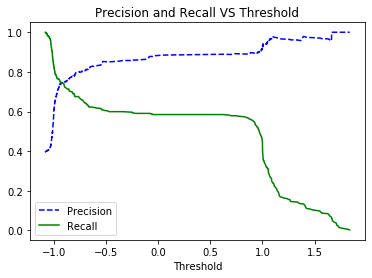

In [56]:
def plot_precision_recall_VS_threshold(precisions, recalls, thresholds):
    #%matplotlib notebook 
    plt.plot(thresholds, precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds, recalls[:-1],'g-',label='Recall')
    plt.xlabel('Threshold')
    plt.title("Precision and Recall VS Threshold")
    plt.legend()
    plt.show()

    
plot_precision_recall_VS_threshold(precisions,recalls,thresholds)
    

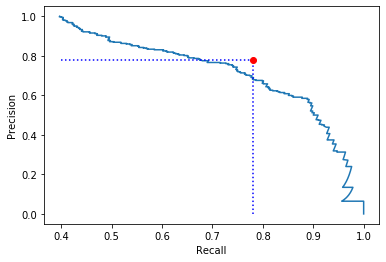

In [57]:
plt.plot(precisions,recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot([0.78, 0.78], [0.0, 0.78], "b:")
plt.plot([0.4, 0.78], [0.78, 0.78], "b:")
plt.plot([0.78], [0.78], "ro")
plt.show()

# For a threshold = -0,929522 we have a precision about 0.77 let's check it

In [58]:
threshold_70_precision = thresholds[np.argmax(precisions >=0.7)]
threshold_70_precision #-0.765

-0.9643039028163114

In [59]:
y_surv_pred_70 = (y_surv_scores >= threshold_70_precision)

#Precision and recall
print("Precision:", precision_score(y_survived,y_surv_pred_70))
print("Recall:", recall_score(y_survived,y_surv_pred_70))

Precision: 0.7005347593582888
Recall: 0.7660818713450293


Instead of using predict method, we use the decision function. We will have the score for each instance, and we can compute the final result by selecting the correct threshold. 

y_test_pred_Classifier = (SVC_clf.decision_function(Data_test_prepared) >= threshold_70_precision)

output = pd.DataFrame({'PassengerId': Data_test.PassengerId,
                       'Survived': y_test_pred_Classifier})

output.to_csv('dataset/submission.csv', index=False)
#!kaggle competitions submit -c titanic -f dataset/submission.csv -m "With rounded values (2nd)"

#### Try to fine tune the model

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_grid_SVC = [
                 {'kernel':['linear'],
                   'C':uniform.rvs(loc=0,scale=1,size=500,random_state=0),
                   'tol':uniform.rvs(loc=0,scale=1e-4,size=500,random_state=1)
                     },
                  {'kernel':['poly'],
                   'degree':[1,2,3],
                   'gamma':uniform.rvs(loc=0,scale=1,size=500,random_state=2),
                   'coef0':uniform.rvs(loc=0,scale=1,size=500,random_state=5),
                   #'C':uniform.rvs(loc=0,scale=1,size=500,random_state=3),
                   'tol':uniform.rvs(loc=0,scale=1e-4,size=500,random_state=4)
                     },
                      ]

grid_search_SVC = RandomizedSearchCV(SVC_clf,
                               param_distributions=param_grid_SVC,
                               cv=5,n_iter=10,scoring='accuracy',
                               verbose=3)

grid_search_SVC.fit(Data_prepared,y_survived)


for mean,params in zip(grid_search_SVC.cv_results_['mean_test_score'],grid_search_SVC.cv_results_['params']):
    print(mean,"\n", params)


grid_search_SVC.best_params_

final_model = grid_search_SVC.best_estimator_

final_model.fit(Data_prepared,y_survived)

y_surv_pred = cross_val_predict(final_model,Data_prepared,y_survived,
                         verbose=0,cv=5,n_jobs=1)


print('Confusion_Matrix\n',confusion_matrix(y_survived,y_surv_pred))
      
#Precision and recall
print("Precision:", precision_score(y_survived,y_surv_pred))
print("Recall:", recall_score(y_survived,y_surv_pred))

precisions,recalls,thresholds = precision_recall_curve(y_survived,final_model.decision_function(Data_prepared))

plot_precision_recall_VS_threshold(precisions,recalls,thresholds)


plt.plot(precisions,recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# For a threshold = -0,929522 we have a precision about 0.77 let's check it

y_test_pred_best_classifier = final_model.predict(Data_test_prepared)
y_test_pred_best_classifier

output = pd.DataFrame({'PassengerId': Data_test.PassengerId, 'Survived': y_test_pred_best_classifier})

output.to_csv('dataset/submission.csv', index=False)

#!kaggle competitions submit -c titanic -f dataset/submission.csv -m "With best SVC classifier (4th)"

## KNeighborsClassifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier

KNC_clf = KNeighborsClassifier()
KNC_clf.fit(Data_prepared,y_survived)

surv_predict_KNC= KNC_clf.predict(Data_prepared)

KNC_ACCURACY = accuracy_score(y_survived,surv_predict_KNC)
print("ACCURACY:", KNC_ACCURACY)

ACCURACY: 0.8574635241301908


In [64]:
scores_KNC = cross_val_score(KNC_clf,Data_prepared,y_survived,
                         verbose=0,scoring='accuracy',
                         cv=5,n_jobs=1)

In [65]:
print(scores_KNC)

[0.77653631 0.7752809  0.83146067 0.80337079 0.79213483]


In [66]:
y_surv_pred_KNC = cross_val_predict(KNC_clf,Data_prepared,y_survived,
                         verbose=0,cv=5,n_jobs=1)

In [67]:
confusion_matrix(y_survived,y_surv_pred_KNC)

array([[479,  70],
       [112, 230]], dtype=int64)

In [68]:
#Precision and recall
print("Precision:", precision_score(y_survived,y_surv_pred_KNC))
print("Recall:", recall_score(y_survived,y_surv_pred_KNC))

Precision: 0.7666666666666667
Recall: 0.672514619883041


In [69]:
y_test_pred_KNC = KNC_clf.predict(Data_test_prepared)

output = pd.DataFrame({'PassengerId': Data_test.PassengerId,
                       'Survived': y_test_pred_KNC})

output.to_csv('dataset/submission.csv', index=False)
#!kaggle competitions submit -c titanic -f dataset/submission.csv -m "With rounded values (2nd)"

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Tree_clf = DecisionTreeClassifier()
Tree_clf.fit(Data_prepared,y_survived)

surv_predict_tree_clf = Tree_clf.predict(Data_prepared)
TREE_ACCURACY = accuracy_score(y_survived,surv_predict_tree_clf)
print("ACCURACY:", TREE_ACCURACY)

In [ ]:
scores_TREEC = cross_val_score(Tree_clf,Data_prepared,y_survived,
                         verbose=0,scoring='accuracy',
                         cv=5,n_jobs=1)

In [ ]:
print(scores_TREEC)

## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Forest_clf = RandomForestClassifier()
Forest_clf.fit(Data_prepared,y_survived)

surv_predict_forest_clf = Forest_clf.predict(Data_prepared)
FOREST_ACCURACY = accuracy_score(y_survived,surv_predict_forest_clf)
print("ACCURACY:", TREE_ACCURACY)

# Modify the preprocessing Data

In [ ]:
# Imputer for categorical value ! 

# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [ ]:
#Numerical attributes

Numerical_attribs = ['Age','SibSp', 'Parch','Fare']

new_num_pipiline = Pipeline([
    ("fill_miss_value",SimpleImputer(strategy='median')),
    #("scaled",MinMaxScaler())                         
                             ])
Categorical_attribs = ['Pclass','Sex','Embarked']

new_cat_pipeline = Pipeline([
    ("fill_miss_value",MostFrequentImputer()),
    ("encoder",OneHotEncoder(sparse=False)),
                            ])

full_data_transformer = ColumnTransformer([
    ("numerical",new_num_pipiline,Numerical_attribs),
    ("categorical",new_cat_pipeline,Categorical_attribs)
                                          ])
Data_train = pd.read_csv(Train_path)
full_data_transformer.fit(Data_train)

In [ ]:
# If we want to get the different columns

# Get the columns for the one hot encoder
cat_features = []

full_cat_list = full_data_transformer.named_transformers_['categorical']['encoder'].categories_

for cat_list in full_cat_list:
    for elt in cat_list:
        cat_features.append(elt)
        
Data_prepared = full_data_transformer.fit_transform(Data_train)
Features_list = Numerical_attribs + cat_features

# We can rebuild a pandas DataFrame
pd.DataFrame(Data_prepared,columns=Features_list)
